# Ch 4 - Inferential Statistics

In Tuesday's class you had learnt about how to infer parameters of, and draw conclusions about a population using a statistic (number/property describing a characteristic of a sample). 
Further, there were examples of wine-data which provided information about:
* Understanding sampling distributions
* Method 1: Point estimates
* Method 2: Confidence intervals
* Method 3: Hypothesis testing

In this lab session, we will look into the following
* Exercise importing function for files of .txt, .xlsx, .csv 
* Demostration of Central Limit Theorem.
* Confidence Intervals. 
* t-distributions and stats packages. 

In some point, we will make use of random numbers as data and/or wine-data. 

## Autograder Setup
The next code cell should be uncommented to run the autograder tests when using Colab/DeepNote.  If you are using an environment with `otter-grader` already installed (your own machine, lab machines), then do not uncomment the code. 

In [ ]:
#!pip install otter-grader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 166 kB 7.4 MB/s 
     |████████████████████████████████| 297 kB 47.0 MB/s 
     |████████████████████████████████| 97 kB 6.4 MB/s 
     |████████████████████████████████| 84 kB 2.3 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 


In order to have the data files and test files for this lab, uncomment and run the following cell.  Please comment out before submission. 

In [ ]:
#!wget https://pages.mtu.edu/~lebrown/un5550-f22/labs/lab3/lab3.files.zip
#!unzip lab3.files.zip

--2022-09-16 21:10:05--  https://pages.mtu.edu/~lebrown/un5550-f22/labs/lab3/lab3.files.zip
Resolving pages.mtu.edu (pages.mtu.edu)... 141.219.70.232
Connecting to pages.mtu.edu (pages.mtu.edu)|141.219.70.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 651383 (636K) [application/zip]
Saving to: ‘lab3.files.zip’

lab3.files.zip      100%[===================>] 636.12K  1.03MB/s    in 0.6s    

2022-09-16 21:10:06 (1.03 MB/s) - ‘lab3.files.zip’ saved [651383/651383]

Archive:  lab3.files.zip
   creating: data/
 extracting: data/avocado.zip        
   creating: tests/
  inflating: tests/q9.py             
  inflating: tests/q8.py             


## Lab Setup

In [ ]:
import pandas as pd
import numpy as np
rng_seed = 42
import seaborn as sns
from scipy import stats 
from scipy.stats import norm
import zipfile
import sys
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

import otter
grader = otter.Notebook()

In [ ]:
# set up random number generator 
rng = np.random.default_rng(rng_seed)

## Examples 

### Importing datafiles



#### Importing Excel files
For importing the files as with multiple sheet in excel workbook, in Python 3.0, could use `pd.read_excel()`.

For example, if workbook.xlsx has sheets 'Sheet1' and 'Sheet2', then use `pd.read_excel('workbook.xlsx', 'Sheet1')` or  `('workbook.xlsx', 'Sheet2')`. 



#### Importing from Zipped files 

Now, try importing csv file present inside the zip file named 'avocado' directly (make use of 'zipfile' module).
* https://docs.python.org/3/library/zipfile.html

In [ ]:
# Example code of how to load in data stored within a zip-file
# import zipfile  # already imported above 
zf = zipfile.ZipFile('data/avocado.zip')
avacado = pd.read_csv(zf.open('avocado.csv'))
avacado.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### System information 

If you ever need to check which version of Python or what version of a module you are working with you can use something similar to the following code. 

In [ ]:
# Get to know your system versions
# import sys  # already imported above
print('Python version:', sys.version, '\n')
print('Pandas version:', np.__version__ , '\n')
print('Seaborn version: ', sns.__version__, '\n')

Python version: 3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0] 

Pandas version: 1.21.6 

Seaborn version:  0.11.2 



Let's load the wine data again.

In [ ]:
# Load wine data 
url  =  "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv" 
wine = pd.read_csv(url, sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.shape

(1599, 12)

# Inferential Statistics

The piece of code below is adapted from `nb.week3.ipynb` class material. A sample of size 5 is selected and the mean is calculated.  This is repeated 1000 times, collecting the sample means. 
A histogram function is invoked for sampled means. 

Observe the distribution of the mean samples - is it normal, uniform, gamma, beta ..... ?
It is a normal distribution.

mean pH, mu = 3.3111131957473416


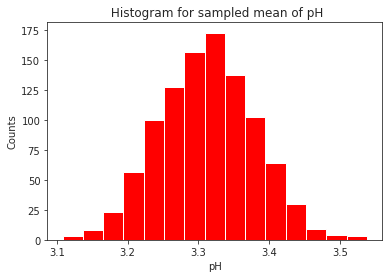

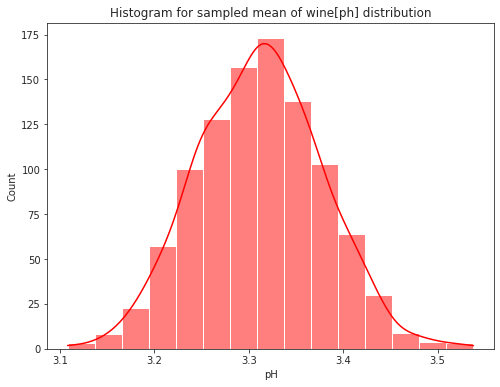

In [ ]:
'''The piece of code from nb.week3.ipynb is provided, use it to  
compute the mean for the 'n' random samples and store in array, means[i]
This is repeated 'N_tests' times. '''

mu = wine["pH"].mean()                                # Mean of population
print("mean pH, mu = " + str(mu))

N_tests = 1000                                        # Num of test to perform
n = 5                                                 # number of samples
means = [0] * N_tests

for i in range(N_tests):
    observations = rng.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()

# Histogram in Matplotlib    
nbins = 15
_ = plt.hist(means, nbins, color= 'red' )
plt.title(' Histogram for sampled mean of pH')
plt.xlabel('pH')
plt.ylabel('Counts')

# Histogram in seaborn
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(means, bins=nbins, color ='red', kde=True)
plt.title('Histogram for sampled mean of wine[ph] distribution')
plt.xlabel('pH')

plt.show()

### Central Limit Theorem

From Chap 4, we had a chance to look into Central Limit Theorem. The initial population distribution was not observed in the class and the mean sampled distribution, i.e., mean of `wine['pH']`, evidently displayed normal distribution (see the plots above).



<!-- BEGIN QUESTION -->

## Exercise 1

Check what was the distribution of the initial population ? Create the  Histogram and read the discussion below.

https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot

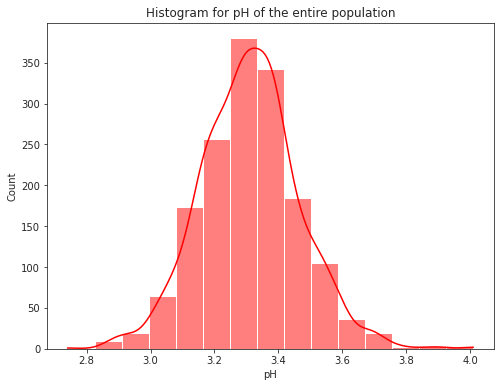

In [ ]:
# Plot the distribution of the population itself i.e., wine['pH']. 
#  Use seaborn rather than matplotlib to create the histogram

sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(wine['pH'], bins=nbins, color ='red', kde=True)
plt.title('Histogram for pH of the entire population')
plt.xlabel('pH')

plt.show()


<!-- END QUESTION -->

Since, the population distribution was also normal distribution plot. We might expect that the sampled mean could be normal distribution. What if we try with different population distribution using random generator available in python library and observe the profile. Does it agree with Central Limit Theorem?

For options regarding random numbers generation in certain distribution pattern, see the link:  
https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

*Think about:* What if the initial population is other than normal distribution. Would CLT come into picture? 



## Exercise 2 - Uniform distribution

In Exercise 1, the distribution of wine pH values is approximately normal.  What about if this data follows another distribution?  How does it affect the distribution of the sampled means?

Let's look if the initial data came from a Uniform distribution.

<!-- BEGIN QUESTION -->



In [ ]:
# Create a pandas DataSeries - created using random numbers 
#  Sample 1000 numbers from the uniform distribution - unif(0,1) 
#  Hint: look at np.random.uniform() function, using the random number generator
#   seeded above:  rng.uniform()
                                                                                      
s = np.random.uniform(0,1,1000)
s = pd.DataFrame(s)
s.head()


,0
0,0.254905
1,0.430523
2,0.423075
3,0.917954
4,0.726277


Ellipsis

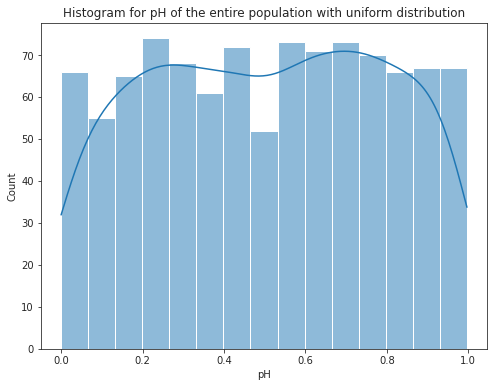

In [ ]:
# Plot a histogram for the initial population, stored in 's'
#  Use seaborn for the plot 
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(s, bins=nbins, kde=True, legend = False)
plt.title('Histogram for pH of the entire population with uniform distribution')
plt.xlabel('pH')
...


mean population, mu = 0.505151280285845


Ellipsis

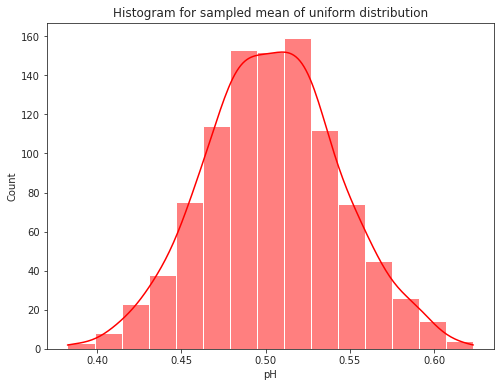

In [ ]:
# In this cell, collection of 'n' random samples 'N-test' times 
#  storing the mean of each collection in the array.  
# Then, create a histogram of the sampled means. 

# As a start I have copied the most of the code for where this was done for wine-pH.  
# Modify it to get the sample means of the uniformly distributed sample population.

mu = s[0].mean()
print("mean population, mu = " + str(mu))

N_tests = 1000
n = 50 
means = [0] * N_tests

for i in range(N_tests):
    observations = rng.choice(s.index.values,n)
    sampled_pop = s.loc[observations]
    means[i] = sampled_pop[0].mean()

nbins = 15
# Create a histogram of the sampled means from the uniform distribution
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(means, bins=nbins, color ='red', kde=True)
plt.title('Histogram for sampled mean of uniform distribution')
plt.xlabel('pH')
...


<!-- END QUESTION -->

#####  Once the code is up and running. Examine the following for better understanding. 
 * How is plot sensitive for 'n' - no of samples drawn from population?
 * How does the profile change when 'N_test' - is increased or decreased?

<!-- BEGIN QUESTION -->

## Exercise 3 - Gamma distributions

Let's examine this again if the initial data is from a Gamma distributions. 

Will the Central Limit Theorem agree here as well? 

Read through Chapter 4 for more information.  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  if __name__ == '__main__':


mean of random dataset, mu = 0    3.899806
dtype: float64


Text(0.5, 0, 'pH')

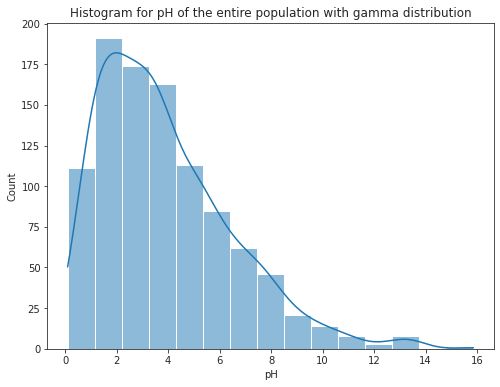

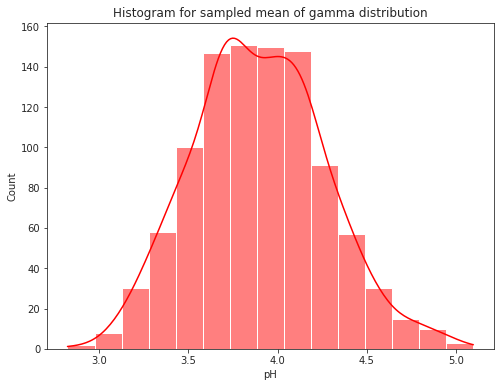

In [ ]:

# Perform the similar operation as above but on a different distribution, e.g., gamma. 
# Refer to the link  provided earlier to generate the initial samples. 
# Continue to use seaborn for plotting.


# To try Gamma distribution function - np.random.gamma
#   with the random number generator - rng.gamma
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
s = pd.Series( )
s = np.random.gamma(shape, scale, 1000)
s = pd.DataFrame(s)
s.head()


# Histogram plot of initial population
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(s, bins=nbins, kde=True, legend = False)
plt.title('Histogram for pH of the entire population with gamma distribution')
plt.xlabel('pH')


mu = s.mean();
print("mean of random dataset, mu = " + str(mu))

N_tests = 1000
n = 50
means = [0] * N_tests


# Histogram of sampled means 
for i in range(N_tests):
    observations = rng.choice(s.index.values,n)
    sampled_pop = s.loc[observations]
    means[i] = sampled_pop[0].mean()

nbins = 15
# Create a histogram of the sampled means from the uniform distribution
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(means, bins=nbins, color ='red', kde=True)
plt.title('Histogram for sampled mean of gamma distribution')
plt.xlabel('pH')

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Exercise 4 - Wald distributions

Let's examine this again if the initial data is from a Wald distributions. 

Will the Central Limit Theorem agree here as well? 

Read through Chapter 4 for more information.  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


mean of random dataset, mu = 0    3.001159
dtype: float64


Text(0.5, 0, 'pH')

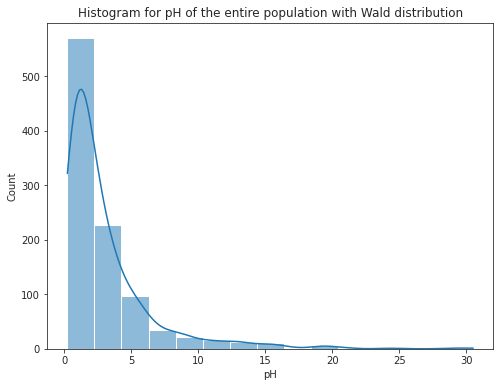

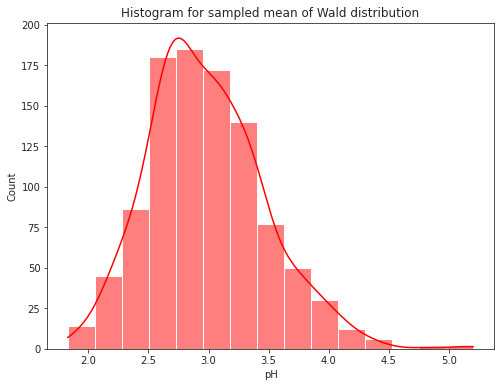

In [ ]:

# Perform the similar operation as above but on a different distribution, e.g., wald. 
# Refer to the link  provided earlier to generate the initial samples. 
# Continue to use seaborn for plotting.


# To try Wald distribution function - np.random.wald
#  use the random number generator - rng.wald 
s = pd.Series( )
shape, scale = 3, 2
s = np.random.wald(shape, scale, 1000)
s = pd.DataFrame(s)
s.head()


# Histogram plot of initial population
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(s, bins=nbins, kde=True, legend = False)
plt.title('Histogram for pH of the entire population with Wald distribution')
plt.xlabel('pH')


mu = s.mean();
print("mean of random dataset, mu = " + str(mu))

N_tests = 1000
n = 50
means = [0] * N_tests





# Histogram of sampled means 
for i in range(N_tests):
    observations = rng.choice(s.index.values,n)
    sampled_pop = s.loc[observations]
    means[i] = sampled_pop[0].mean()

nbins = 15
sns.set_style('whitegrid')
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.histplot(means, bins=nbins, color ='red', kde=True)
plt.title('Histogram for sampled mean of Wald distribution')
plt.xlabel('pH')
 
 

<!-- END QUESTION -->

## Measuring Variability of Estimates

Since, both the uniform and other distribution in population resulted in the normal (Gaussian) distribution type in the sampled mean. Now, Method-1 (point estimates) and Method 2 (Confidence Interval) can be applied.  



<!-- BEGIN QUESTION -->

## Exercise 5 - Confidence Intervals

Refer to section 4.3.1 and 4.3.2 in the textbook and from `nb.week3` notebook. Explain in words (in the below Markdown cell), what is a Confidence Interval ? What does it mean 95% C.I ? 

**ANSWER HERE:**
* A confidence interval is a probable range of values of the population parameter, which is calculated based on the sample statistics.
* mean 95% confidence interval means that if we randomly choose n observations from the population N times (N should be large), around 95% of times mean of each of n observations (samples) will be within the confidence interval.

<!-- END QUESTION -->

### Example - Confidence Intervals

Spend some time reviewing https://docs.scipy.org/doc/scipy/reference/stats.html


* Below piece of code is replicated from `nb.week3`. Have a look into the calculation of Confidence Intervals. What happens when confidence level is changed? to 90% --> 95% --> 99% --> 99.9 %.

* Check with different no of samples. 
* Check what happens if the no. of N-test is increased. 

Read: 4.3.2 in textbook

We are 99.0 % confident that the interval,
   [2.8660669944291284, 3.8371330055708723] contains the mean.


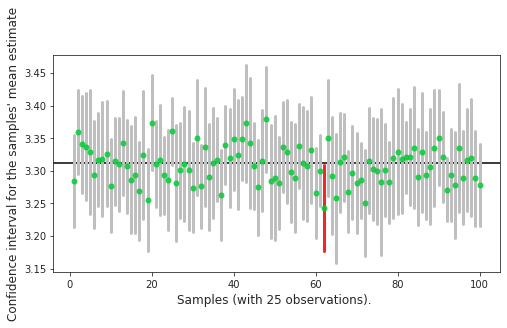

In [ ]:
''' observe the output plot while changing the Confidence level, 
no of samples and no of times the test is performed '''

# some sampled mean. Note, not mean of population
xbar = sampled_wines["pH"].mean() 
# some sampled S.D. Note, not s.d. of population
sigma = sampled_wines["pH"].std() 


alpha = 0.01

z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
ci = [xbar - sigma*z_alphadiv2, xbar + sigma*z_alphadiv2 ]
print ("We are", round (confidence,5)*100 , "% confident that the interval,")
print ("  ",  ci,  "contains the mean.")

N_test = 100
n = 25

means = np.array([0.0] * N_test)   # initialize list for means
sigma = np.array([0.0] * N_test)   # initialize list for standard deviation
ci = np.array([[0.0,0.0]] * N_test)  # initialize list for confidence intervals
mu = wine["pH"].mean()  # true mean


for i in range(N_test):
    observations = rng.choice(wine.index.values,n)
    sampled_wines = wine.loc[observations]
    means[i] = sampled_wines["pH"].mean()
    sigma[i] = sampled_wines["pH"].std()
    ci[i] = means[i] + np.array([-sigma[i] * z_alphadiv2/np.sqrt(n), 
                                 sigma[i]*z_alphadiv2/np.sqrt(n)])

out1 = ci[:,0] > mu # flag CI that do not contain the "true" mean
out2 = ci[:,1] < mu # flag CI that do not contain the "true" mean


fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ind = np.arange(1, N_test+1)
ax.axhline(y = mu, 
           xmin = 0, 
           xmax = N_test+1, 
           color = [0, 0, 0])

ci = np.transpose(ci)
ax.plot([ind,ind], 
        ci, 
        color = '0.75', 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out1],ind[out1]], 
        ci[:, out1], 
        color = [1, 0, 0, 0.8], 
        marker = '_', 
        ms = 0, 
        linewidth = 3)
ax.plot([ind[out2],ind[out2]], 
        ci[:, out2], 
        color = [1, 0, 0, 0.8], 
        marker = '_',
        ms = 0, 
        linewidth = 3)
ax.plot(ind, 
        means, 
        color = [0, .8, .2, .8], 
        marker = '.',
        ms = 10, 
        linestyle = '')
ax.set_ylabel("Confidence interval for the samples' mean estimate",
              fontsize = 12)
ax.set_xlabel('Samples (with %d observations). '  %n, 
              fontsize = 12)
n = plt.show()

<!-- BEGIN QUESTION -->

## Exercise 6

Now assume that only the good quality wines are distilled at one of the wineries. It is known they contain pH greater than and equal to 3.5. The sampled mean by a quality inspector was 3.56 for a batch of 15 such wines. What is the 95% CI for mean? 
 

In [ ]:


# We are interested in only a wines which have pH greater than 3.5. 
# This becomes our population  of interest

n = 15
alpha = 0.05

# Sample Mean
Xbar = 3.56

# Filtering data for higher quality wines with pH >= 3.5 
highquality = wine[wine['pH'] >= 3.5]
sigma = highquality['pH'].std()


observations = np.random.choice(highquality.index.values, 15)
sampled_observations = highquality.loc[observations]

mu = sampled_observations['pH'].mean()
sigma = sampled_observations['pH'].std()
print('The mean is :', mu, '& the Std deviation is:', sigma)


# standard error computation
se = sigma/np.sqrt(n)
z_alphadiv2 = norm.ppf(1-alpha/2)
confidence = norm.cdf(z_alphadiv2)-norm.cdf(-z_alphadiv2)
CI = [Xbar - se*z_alphadiv2,Xbar + se*z_alphadiv2 ]

print('We are', round(100*confidence,3), "% confident that the interval")
print("   ", CI , "contains the mean.")


The mean is : 3.548666666666667 & the Std deviation is: 0.05540328338215902
We are 95.0 % confident that the interval
    [3.5319625853386043, 3.588037414661396] contains the mean.


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Exercise 7

Using `stats.norm.interval()`, CI can be computed.  Use this function to compute the 95% CI for mean of 3.56 (batch of 15)

In [ ]:
CIs = stats.norm.interval(0.95, loc=3.56, scale=se)
print('We are', round(100*confidence,3), "% confident that the interval")
print('   ', CIs , "contains the mean.")
       

We are 95.0 % confident that the interval
    (3.5319625853386043, 3.588037414661396) contains the mean.


<!-- END QUESTION -->

### Example - t distribution


If number of samples are low, it is better to use the t distribution.

Recall, the exercise from `nb.week3`.  An engineer working for Ford is interested in the population of all vehicles that have an engine size of 3.0L or larger, and is particular interested in $\mu$, the highway mileage (mpg). Assume the population is normally distributed. The sample mean among a random sample of 14 vehicles is 18.3 mpg, and the sample standard deviation is 5.1 mpg (note: $\sigma$ is unknown). What is the 95% CI for $\mu$?

In [ ]:
from scipy.stats import t
alpha = 0.05
xbar = 18.3
n = 14
dof = n-1
se = 5.1/np.sqrt(n)
t_alphadiv2 = t.ppf(1-alpha/2,dof)
confidence = t.cdf (t_alphadiv2,dof)-t.cdf(-t_alphadiv2, dof)
ci = [xbar - se*t_alphadiv2, xbar + se*t_alphadiv2]


print('we are', round(100*(1-alpha), 3), '%', "confident that the interval")
print('   ',  ci , "contains the mean.")



we are 95.0 % confident that the interval
    [15.355347668416327, 21.244652331583676] contains the mean.


## Exercise 8 

We can make a function out of the above code and/or can invoke Stats package from SciPy for the same. Recommended is to get use to stats package - `scipy.stats.t()`

Apply `stats.t.interval()` function here to obatin the 95% CI, the sigma for this is known to be around 5.1. `xbar` is 18.3. The degrees of freedom are same as above n-1. 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.t.html


In [ ]:
# Use scipy.stats  
from scipy.stats import t
CIt = stats.t.interval(alpha=0.95, df =13, loc = 18.3, scale = 5.1/np.sqrt(14))
print('we are', round(100*(1-alpha), 3), '%', "confident that the interval")
print("   ", CIt , "contains the mean.")

we are 95.0 % confident that the interval
    (15.355347668416327, 21.244652331583676) contains the mean.


In [ ]:
grader.check("q8")

q8 results: All test cases passed!

### Example 

Calculate the standard error using `scipy.stats.sem()`

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.sem.html

Standard error is computed by \begin{align}
S.E = \frac{\sigma}{\sqrt{n}}
\end{align}



In [ ]:
from scipy import stats
alpha = 0.05
sigma = sampled_observations['pH'].std()
n = 15
se = sigma/np.sqrt(n)
sef =  stats.sem(sampled_observations['pH'])
print('S.E from sigma and n is: ', se)
print(' and S.E from stats is also: ', sef)

S.E from sigma and n is:  0.0143050662576208
 and S.E from stats is also:  0.0143050662576208


## Exercise 9 

Now you have worked on `stats.normal.interval` and `stats.t.interval` to compute the CI. Try to solve the questions below.

 The random daily quality check at packaging unit yielded sigma of 2.0 for a samples of 150 observations and the mean was 3.7. Find the 90% confidence interval for of the mean.

In [ ]:
# compute the S.E (standard Error) using the formula explained earlier. 
from scipy import stats
sigma = 2
n = 150
se = sigma/np.sqrt(n)

# Use the most appropriate function: norm.interval or t.interval 
alpha = 0.1
# CIs = stats.t.interval(1-alpha, df=n-1, loc = 3.7, scale = se)
CIs = stats.norm.interval(0.90, loc=3.7, scale=se)
# CIs = stats.norm.interval(...)
# CIs = stats.t.interval(...)

print('we are', round(100*(1-alpha), 3), "% confident that the interval")
print("   ", CIs , "contains the mean.")

we are 90.0 % confident that the interval
    (3.4313965274935105, 3.9686034725064894) contains the mean.


In [ ]:
grader.check("q9")

q9 results: All test cases passed!

### Extra Exercises 

Now, if you have time, try to implement what you have learnt in this session to the avacado dataset, we had extracted from zipfile.

1. What is the distribution of average price in the dataset?
2. Distribution of sampled price?
3. CI for a case. 